In [0]:
!unzip "/content/object-detection-deep-learning.zip"

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
import numpy as np
import cv2

In [0]:
net = cv2.dnn.readNetFromCaffe("/content/object-detection-deep-learning/MobileNetSSD_deploy.prototxt.txt", 
                               "/content/object-detection-deep-learning/MobileNetSSD_deploy.caffemodel")


In [0]:
import glob

Computing object detections for..example_01.jpg


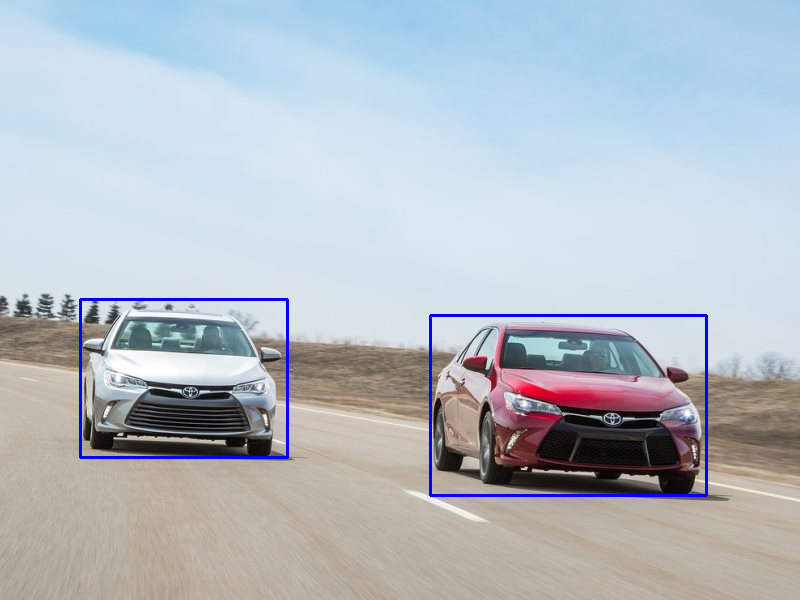

Computing object detections for..example_02.jpg


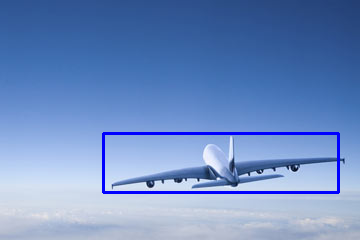

Computing object detections for..example_03.jpg


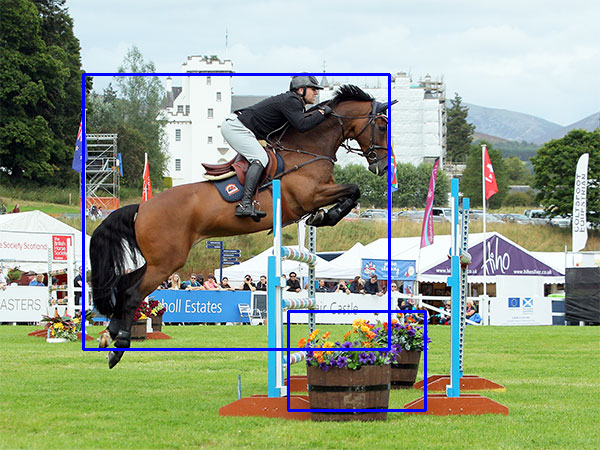

Computing object detections for..example_04.jpg


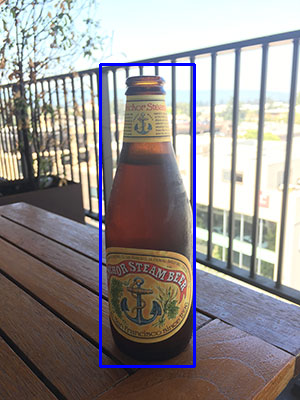

Computing object detections for..example_05.jpg


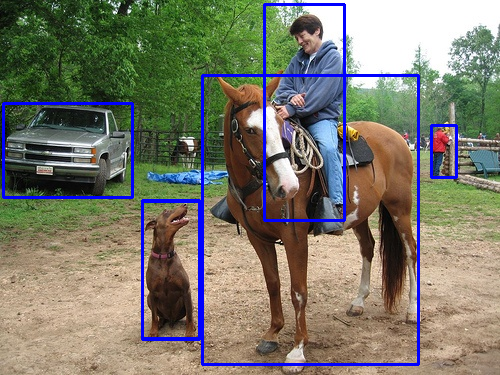

Computing object detections for..example_06.jpg


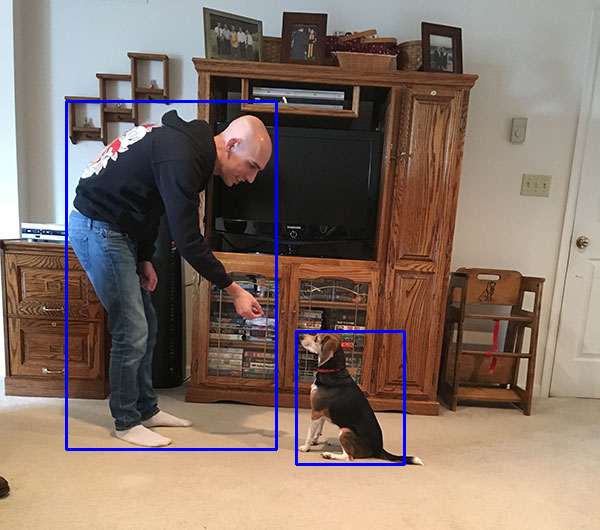

In [0]:
for file in sorted(glob.glob("/content/object-detection-deep-learning/images/*.jpg")):
  image = cv2.imread(file)
  (h, w) = image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)

    # pass the blob through the network and obtain the detections and
    # predictions
  print("Computing object detections for" + ".." + file.split("/")[-1])
  net.setInput(blob)
  detections = net.forward()
  
  for i in np.arange(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	  confidence = detections[0, 0, i, 2]

	  # filter out weak detections by ensuring the `confidence` is
	  # greater than the minimum confidence
	  if confidence > 0:
		# extract the index of the class label from the `detections`,
		# then compute the (x, y)-coordinates of the bounding box for
		# the object
		  idx = int(detections[0, 0, i, 1])
		  box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		  (startX, startY, endX, endY) = box.astype("uint16")
		# display the prediction
		  cv2.rectangle(image, (startX, startY), (endX, endY),(255,0,0),2)
		  y = startY - 15 if startY - 15 > 15 else startY + 15
  # show the output image
  cv2_imshow(image)
  cv2.waitKey(0)